In [1]:
import tensorflow as tf 
import keras 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import make_column_transformer 

In [2]:
from tensorflow.keras.datasets import fashion_mnist 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

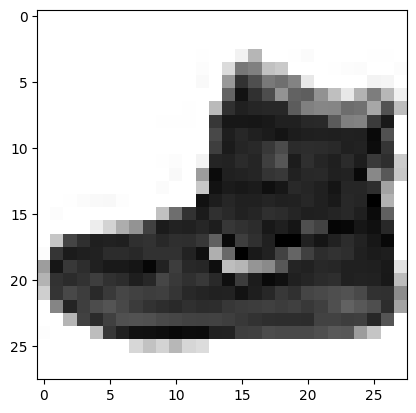

In [4]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_train.max()

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]


In [8]:
# model-1 
keras.utils.set_random_seed(42)
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(100, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
]) 

model_1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(0.0005), 
    metrics=['accuracy']
)

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20)) 
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    restore_best_weights=True
)

history_1 = model_1.fit(
                X_train_norm, 
                y_train, 
                validation_data=(X_test_norm, y_test), 
                epochs=150,
                batch_size=4096, 
                verbose=0, 
                callbacks=[early_stopping]
            )

# model_1.summary()

In [9]:
model_1.evaluate(X_test_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8801 - loss: 0.3455


[0.3436484634876251, 0.8804000020027161]

In [10]:
len(pd.DataFrame(history_1.history))

105

In [11]:
y_preds = model_1.predict(X_test_norm)
y_preds_act = y_preds.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


In [12]:
def plot_a_random_image(test_data=X_test, 
             y_true=y_test, 
              y_pred=y_preds_act,
              class_names=class_names): 

    index = np.random.randint(len(y_true))

    label_index = y_pred[index]

    plt.imshow(test_data[index], cmap=plt.cm.binary)

    if class_names[label_index] == class_names[y_test[index]]: 
        color = "green"
    else: 
        color = "red"
    plt.title(f"{class_names[label_index]} / {class_names[y_test[index]]}", c=color); 

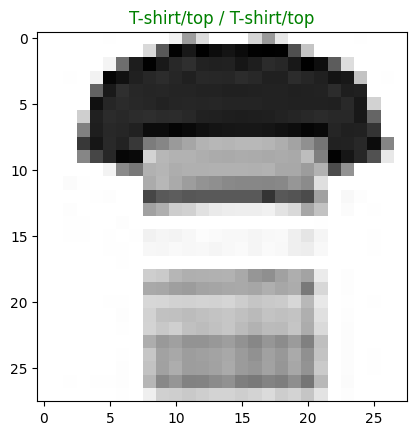

In [13]:
plot_a_random_image(test_data=X_test, 
             y_true=y_test, 
              y_pred=y_preds_act,
              class_names=class_names)

In [14]:
def plot_n_number_of_images(test_data=X_test,
                            y_true=y_test,
                            y_pred=y_preds,
                            class_names=class_names,
                            n=10): 

    indices = np.random.choice(len(y_true), n, replace=False)
    plt.figure(figsize=(10, 7))

    y_preds_act = y_pred.argmax(axis=1)

    for i in range(len(indices)):
        num_rows = int(np.ceil(n/4))
        ax =plt.subplot(num_rows, 4, i+1) 
        
        true_label = class_names[y_true[indices[i]]] 
        predicted_label = class_names[y_preds_act[indices[i]]]
        predict_proba = y_pred[indices[i]].max()

        if true_label == predicted_label: 
            color="green" 
        else: 
            color="red"

        plt.imshow(test_data[indices[i]], cmap=plt.cm.binary)
        plt.title(f"{predict_proba*100:2.0f}% {predicted_label} / {true_label}", c=color, fontsize=8)

        ax.set_xticks([])
        ax.set_yticks([]);

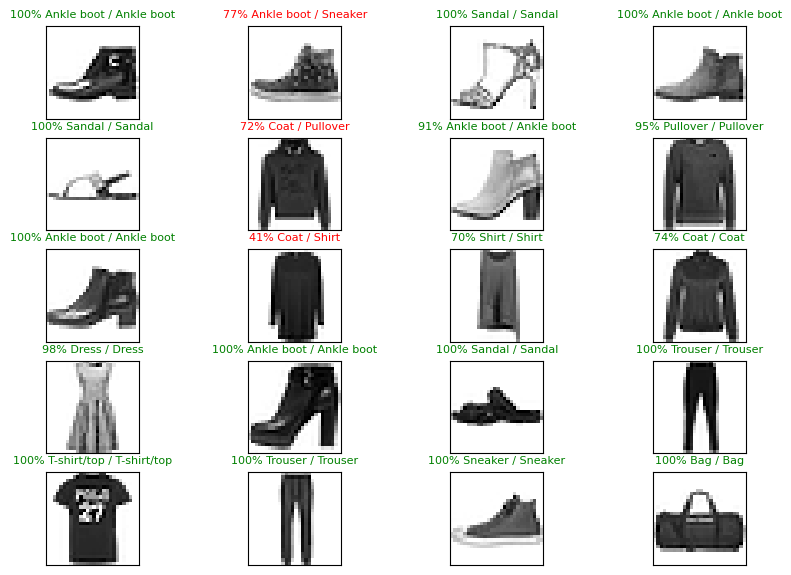

In [18]:
plot_n_number_of_images(n=20)